<a href="https://colab.research.google.com/github/JMML2021/Tasca-M5-T02-Introducci-al-Machine-Learning/blob/main/Tasca_M5_T02_Machine_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [297]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [298]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
# Abro el fichero

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  505 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

Veo que es un fichero sin nombre en las columnas. Utilizo el fichero de TXT e identifico los nombres de las columnas.

In [300]:
columnas = list(df1.columns[:-1])
#columnas[0][0]
columnas

['0.00632',
 '18.00',
 '2.310',
 '0',
 '0.5380',
 '6.5750',
 '65.20',
 '4.0900',
 '1',
 '296.0',
 '15.30',
 '396.90',
 '4.98']

In [301]:
# Asigno una lista con los nombres de las columnas
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

In [302]:
# Analizo los datos con una estadistica descriptiva y confirmo que tengo los nombres de las columnas
print(df1.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [303]:
# Verifico que no hay nulos y los tipos de los datos
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     505 non-null    float64
 1   (ZN,)       505 non-null    float64
 2   (INDUS,)    505 non-null    float64
 3   (CHAS,)     505 non-null    int64  
 4   (NOX,)      505 non-null    float64
 5   (RM,)       505 non-null    float64
 6   (AGE,)      505 non-null    float64
 7   (DIS,)      505 non-null    float64
 8   (RAD,)      505 non-null    int64  
 9   (TAX,)      505 non-null    float64
 10  (PTRATIO,)  505 non-null    float64
 11  (B,)        505 non-null    float64
 12  (LSTAT,)    505 non-null    float64
 13  (MEDV,)     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


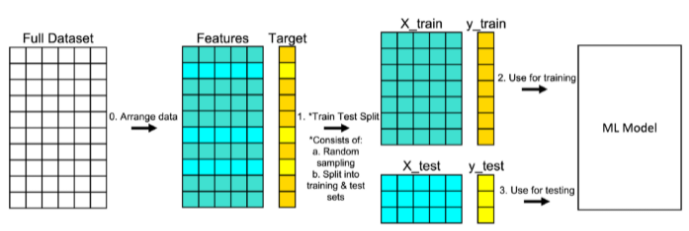

**Vamos a Dividir la base de datos en Train y en Test**

In [304]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [305]:

from sklearn.model_selection import train_test_split   

features = ['CRIM','ZN','INDUS','CHAS','NOX']
#features = columnas
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 5)
xtest shape  :  (101, 5)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


Vamos a ver gráficamente como es cada base de datos (train y test)

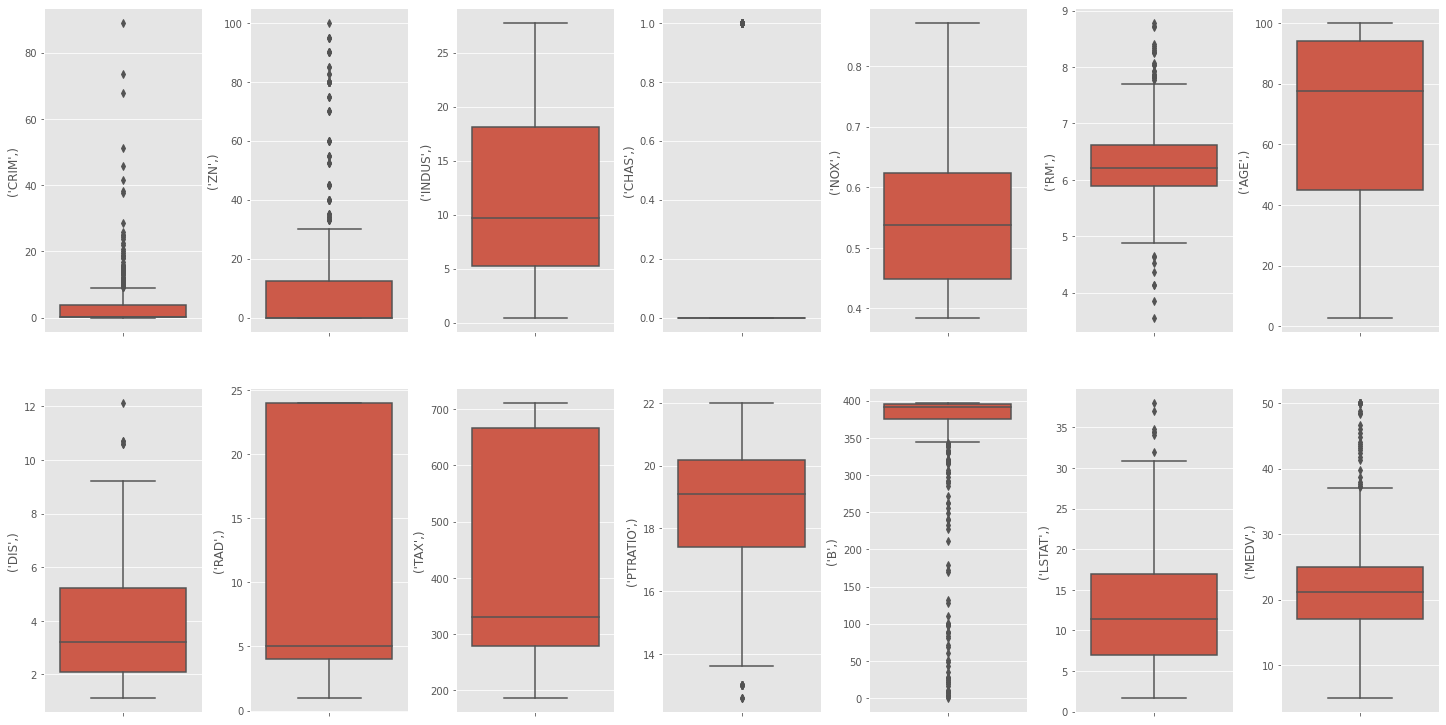

In [306]:
# Dibujamos todas las columnas en su forma original 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0

axs = axs.flatten() 

for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

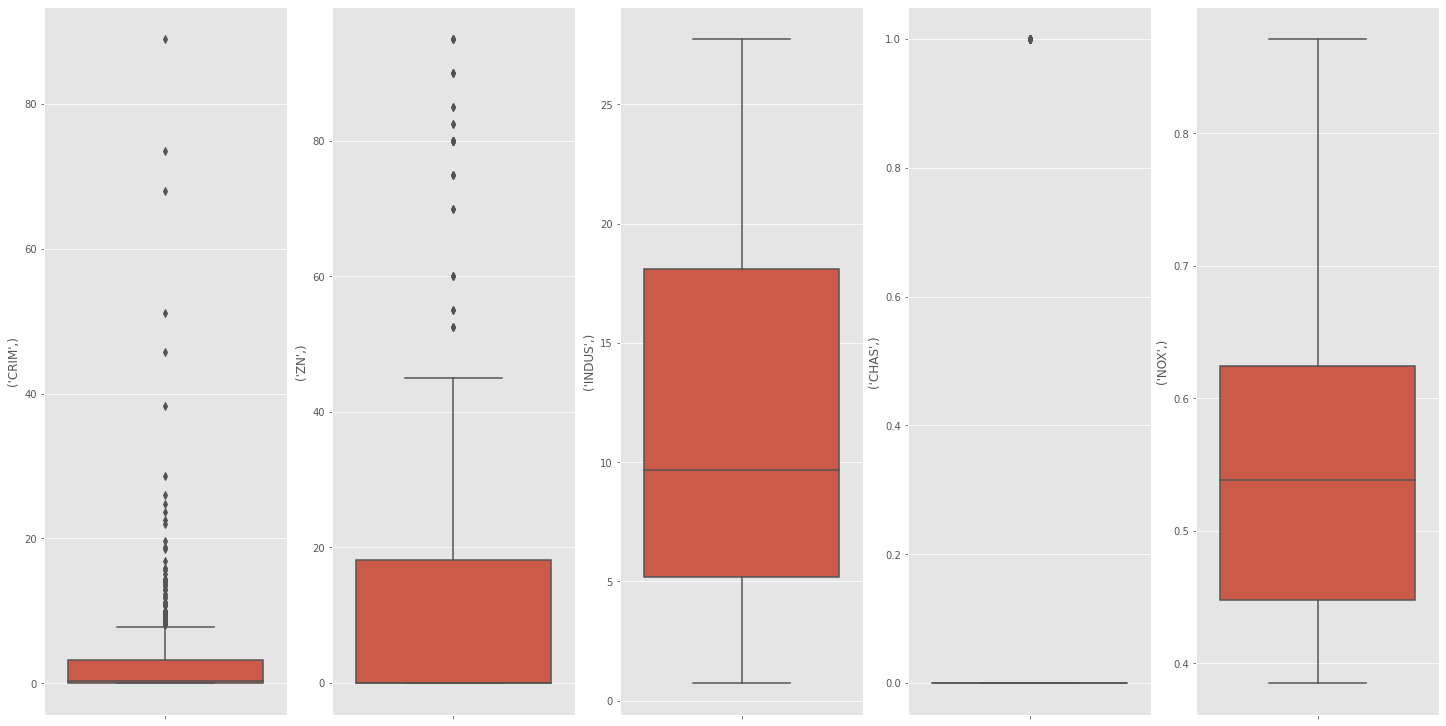

In [307]:
# Ahora dibujo los datos de TRAIN de las columnas 'CRIM','ZN','INDUS','CHAS','NOX'

fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

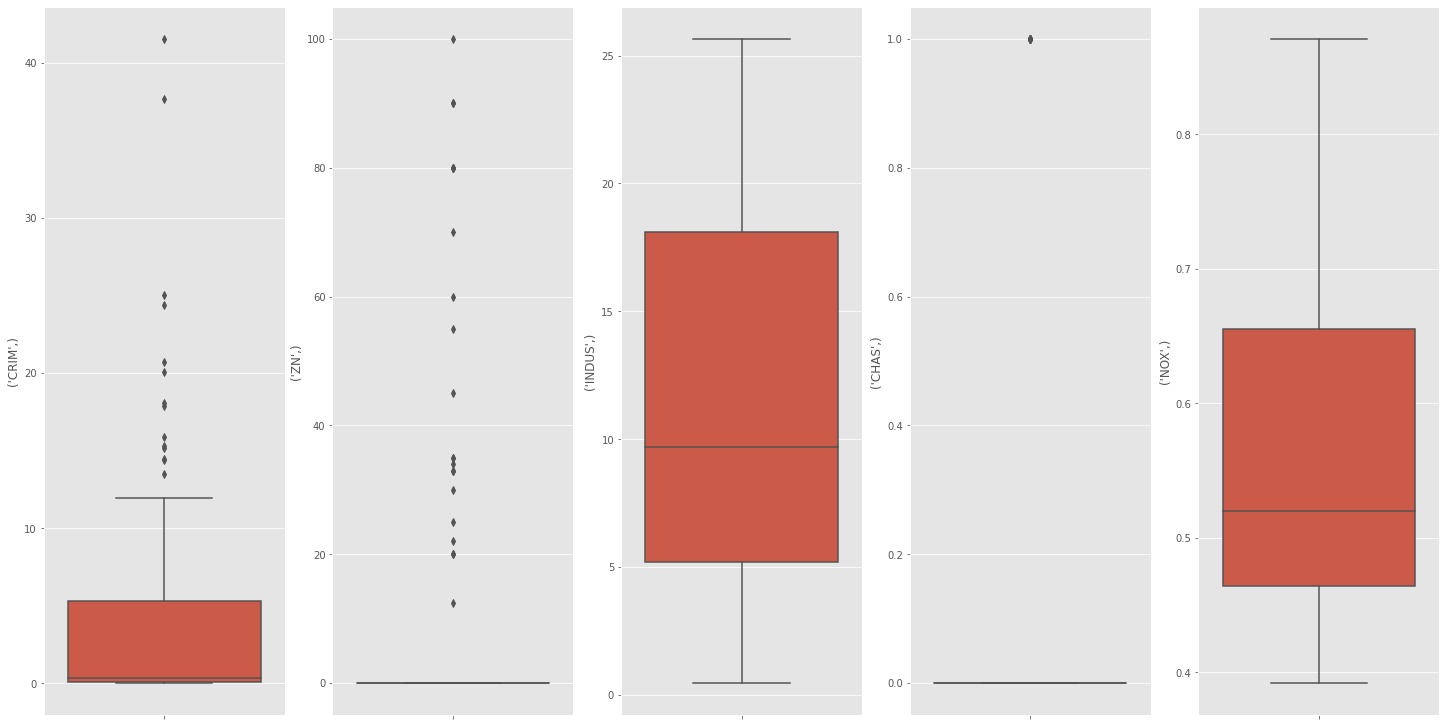

In [308]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtest.items():
    sns.boxplot(y=k, data=xtest, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Conclusion del split:**

Veo que las formas son muy semejantes por lo que considero que la división que hace es aleatoria y los datos son representativos de la base de trabajo original.


Compruebo graficamente (boxplot y aproximacion a curva normal) con la variable de salida entre ytrain e ytest y compruebo que la forma es muy similar.

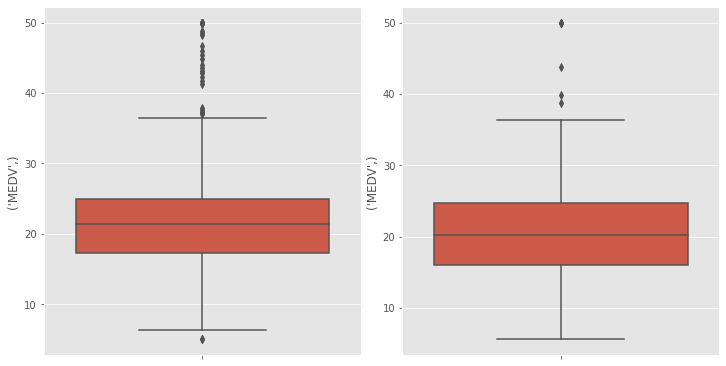

In [309]:
#Dibujo ytrain e ytest

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in ytrain.items():
    sns.boxplot(y=k, data=ytrain, ax=axs[0])
    sns.boxplot(y=k, data=ytest, ax=axs[1])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

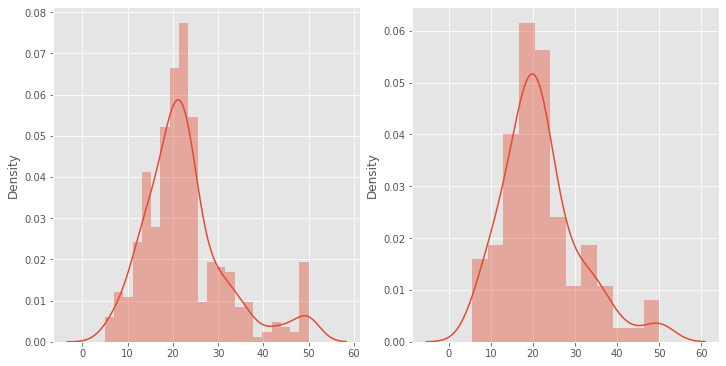

In [310]:

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(ytrain['MEDV'], ax=axs[0])
sns.distplot(ytest['MEDV'], ax=axs[1])
    #sns.distplot(v, ax=axs[index])

    #index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Veo que visualmente las dos graficas de los datos split son muy parecidas, por lo que deduzco que lo ha hecho correctamente.


# - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [313]:
from sklearn.preprocessing import MinMaxScaler
# define data
 
print('MEdia de CRIM:',xtrain['CRIM'].mean())
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(xtrain['CRIM'])
print('Media de CRIM transformado ',scaled.mean())

MEdia de CRIM: CRIM    3.446082
dtype: float64
Media de CRIM transformado  0.03863248924499451


**para que sirve MinMaxScaler:**

Transforma las características escalando cada una de ellas a un rango determinado. Este estimador escala y traduce cada característica individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento,por ejemplo,entre cero y uno.

In [315]:
# Normalizo la columna CRIM

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(xtrain['CRIM'])
normalized_CRIM = scaler.transform(xtrain['CRIM']) 

print(normalized_CRIM[3])

[1.]


**Para que sirve normalizar:**

Normalizar las muestras individualmente a la norma de la unidad. Cada muestra (es decir,cada fila de la matriz de datos)con al menos un componente no nulo se reescala independientemente de las demás muestras para que su norma (l1,l2 o inf)sea igual a uno.

Se utiliza en el machine learning, porque algunos valores de características difieren de otros varias veces. Las características ***con valores más altos*** dominarán el proceso de aprendizaje.

In [316]:
# BINARIZACION

from sklearn.preprocessing import Binarizer


binarizer = Binarizer(threshold=0.2).fit(xtrain['CRIM'])
binary_CRIM = binarizer.transform(xtrain['CRIM'])


**Para que sirve binarizar:**

Binarizar los datos (establecer los valores de las características en 0 o 1)según un umbral. en este caso es 0.2

Los valores superiores al mapa de umbral a 1,mientras que los valores inferiores o iguales al mapa de umbral a 0.Con el umbral por defecto de 0,sólo los valores positivos se asignan a 1.

La binarización es una operación común en los datos de recuento de texto en la que el analista puede decidir considerar únicamente la presencia o ausencia de una característica en lugar de un número cuantificado de ocurrencias,por ejemplo.


class sklearn.dummy.DummyRegressor(*, strategy='mean', constant=None, quantile=None)

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [317]:
#Generating Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
polynomial_CRIMS = poly.fit_transform(xtrain['CRIM'])
print('entrada CRIM:\n..... 3 primeras filas')
print( xtrain['CRIM'][:3])
print ('\nColumnas nuevas, transformadas: ')
print(polynomial_CRIMS[:3])

entrada CRIM:
..... 3 primeras filas
        CRIM
261  0.52014
71   0.09164
479  5.82401

Columnas nuevas, transformadas: 
[[1.00000000e+00 5.20140000e-01 2.70545620e-01]
 [1.00000000e+00 9.16400000e-02 8.39788960e-03]
 [1.00000000e+00 5.82401000e+00 3.39190925e+01]]


In [318]:
xtrain['CRIM'][:3]

,CRIM
261,0.52014
71,0.09164
479,5.82401


**Conclusion de PolynomialFeatures:**

Cuando aplicamos la transformacion polinómica de tipo 2 a una sola columna (CRIM) lo que estamos haciendo es las siguientes operacion, obtenemos otras 3 columnas nuevas con el valor introducido:


$X \Rightarrow 1, X, X^{2}$

por ejemplo 0.052014  --> 1,  0.052014,  0.052014 $^{2}$ --> [1, 0.520, 0.270] 

El problema es que todas las columnas las veremos como correlacionadas


Y si hubieramos introducido 2 columnas entonces hubiera creados estas columnas nuevas:

$X_{1},X_{2} = 1,  X_{1},  X_{2},  X_{1}^{2},  X_{1}*X_{2},  X_{2}^{2}$

Esto nos va ser muy útil cuando calculemos los residuos para ver como se acomoda una ecuación.


Dibujo todas las transformaciones:

 

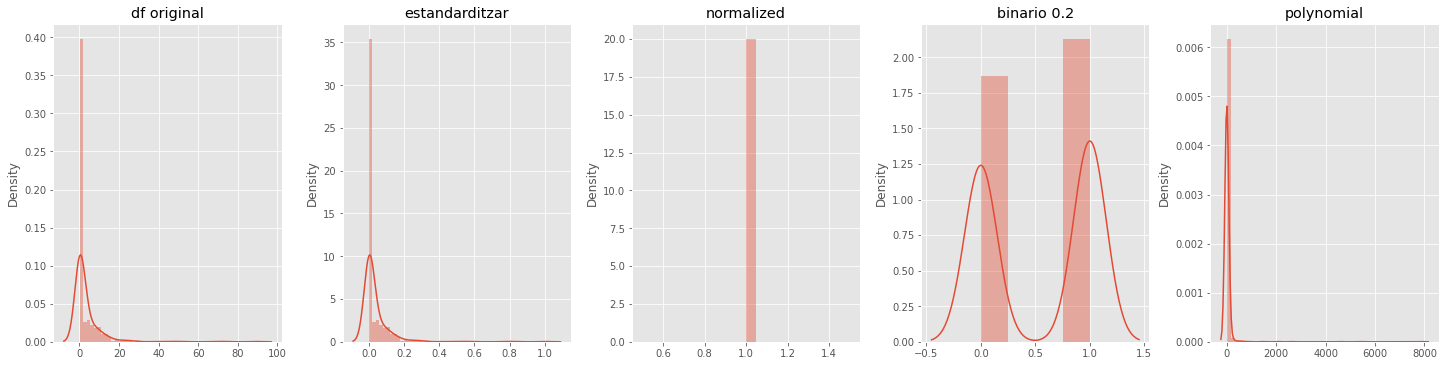

In [319]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(xtrain['CRIM'], ax=axs[0]).set(title='df original')
sns.distplot(scaled, ax=axs[1]).set(title='estandarditzar')
sns.distplot(normalized_CRIM, ax=axs[2]).set(title='normalized')
sns.distplot(binary_CRIM, ax=axs[3]).set(title='binario 0.2')
sns.distplot(polynomial_CRIMS, ax=axs[4]).set(title='polynomial')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

**Reflexión sobre las transformaciones desde un punto de vista operativo:**

Es importante entender para qué queremos las tranformaciones aunque el valor que obtengamos de la estadistica descriptiva nos pueda hacer pensar que no es lo mismo. 

Vamos a conseguir que todos los valores de todas las columnas puedan participar a la hora de crear un modelo, porque si hay valores de magnitud my altos respecto a otros muy pequeños (ejemplo mm v Km) hace que los pequeños cuando no se trasnforman dificimente entrar a participar del modelo.

Otra gran ventaja es la operatividad en el calculo que al estar transformados es mucho más rápida.

Tambien nos permite romper la colinearidad de los datos en diferentes columnas porque por ejemplo $X \rightarrow X^{2} \rightarrow X^{n}$ la hipóteis de correlacion nos saldra baja y querra decir que $X \rightarrow X^{2} \rightarrow X^{n}$ estan correlacionados

In [320]:
binary_CRIM = pd.DataFrame(binary_CRIM)
binary_CRIM[:3]

,0
0,1.0
1,0.0
2,1.0


In [321]:
# Analizo los datos con estadistica descriptiva:

print(binary_CRIM.describe())

                0
count  404.000000
mean     0.532178
std      0.499582
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [322]:
normalized_CRIM = pd.DataFrame(normalized_CRIM)
print(normalized_CRIM.describe())

           0
count  404.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0


In [323]:
polynomial_CRIMS =pd.DataFrame(polynomial_CRIMS)
print(polynomial_CRIMS.describe())

           0           1            2
count  404.0  404.000000   404.000000
mean     1.0    3.446082    88.744553
std      0.0    8.778372   561.399813
min      1.0    0.009060     0.000082
25%      1.0    0.079710     0.006354
50%      1.0    0.243125     0.059114
75%      1.0    3.202962    10.263617
max      1.0   88.976200  7916.764166


# Visualizacion grafica de las transformaciones:

Voy a ver cual es el impacto de las principales transformaciones y como le afectan los outliers

In [324]:
features = ['CRIM','ZN','INDUS','CHAS','NOX']
 
x = df1.loc[:, features]
x= x['CRIM']
y = df1.loc[:, ['MEDV']]

In [325]:
from sklearn.model_selection import train_test_split   
    
X_full, xtest, y_ful, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("X_full shape : ", X_full.shape) 
print("xtest shape  : ", xtest.shape) 
print("y_ful shape : ", y_ful.shape) 
print("ytest shape  : ", ytest.shape) 

X_full shape :  (404, 1)
xtest shape  :  (101, 1)
y_ful shape :  (404, 1)
ytest shape  :  (101, 1)


https://runebook.dev/es/docs/scikit_learn/auto_examples/preprocessing/plot_all_scaling

Aprovecharé esta parte para dar mejor visualizaciona los datos.
https://github.com/puchee99?tab=repositories

In [327]:
# Aquí tengo las distribuciones que voy a trabajar.

distributions = [
    ('Datos sin escalar', X),
    ('Datos después de escalar',
        StandardScaler().fit_transform(X)),
    ('Datos despues de aplicar min-max scalado',
        MinMaxScaler().fit_transform(X)),
    ('Datos depués de  de la transformacion de cuartiles (uniforme)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Datos después de la transformacion (gaussiana)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
]


In [328]:
#@title


dataset = fetch_california_housing()

X_full, y_full = dataset.data, dataset.target

#
X = X_full[:, [0, 2]]


# escalar la salida entre 0 y 1 para la barra de colores
y = minmax_scale(y_full)

# plasma no existe en matplotlib <1,5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

#
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # definir el eje para el primer gráfico
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # definir el eje para el gráfico ampliado
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # definir el eje de la barra de colores
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)

# Dibujar las distribuciones:

def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # El diagrama de dispersión
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Retirar la parte superior y la columna derecha por estética
    # hacer un buen diseño de ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histograma para el eje X1 (función 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histograma para el eje X0 (función 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

In [329]:
#creamos los plots para ver como varia con cada transformación:


#@title

def make_plot(item_idx):
    titulo, X = distributions[item_idx]
    print('--> ', pd.DataFrame(X[0:3])) # Para ver que datos saca

    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(titulo)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Media de Ingresos",
                      x1_label="Cantidad de edificios_1",
                      title="Todos los datos")

    # zoom-in... Para quitar los outliers
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Media de Ingresos",
                      x1_label="Cantidad de edificios",
                      title="Sin outliers")
    
#Dibujamos la escal de colores de y
    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color con la escala de y')

# Dibujo todas las transformaciones y veo la importancia en el posible impacto de los outliers en el calculo del modelo:

0 estudio:  Datos sin escalar
-->          0         1
0  8.3252  6.984127
1  8.3014  6.238137
2  7.2574  8.288136


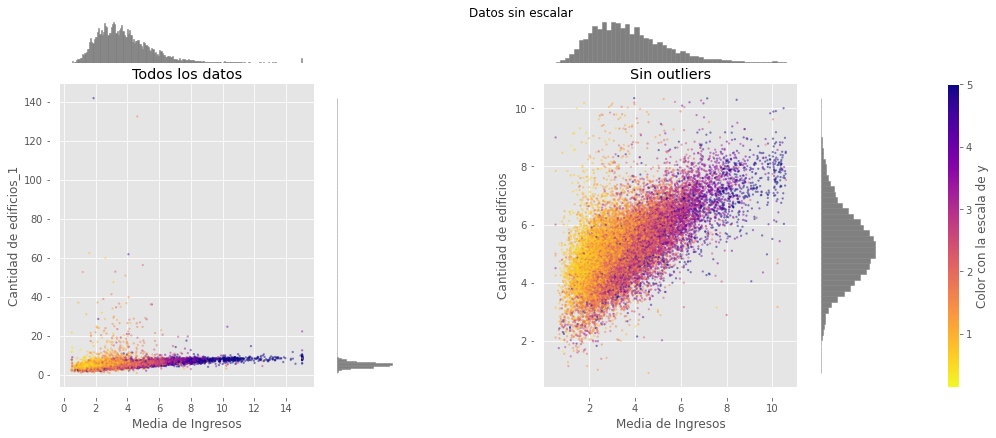

1 estudio:  Datos después de escalar
-->            0         1
0  2.344766  0.628559
1  2.332238  0.327041
2  1.782699  1.155620


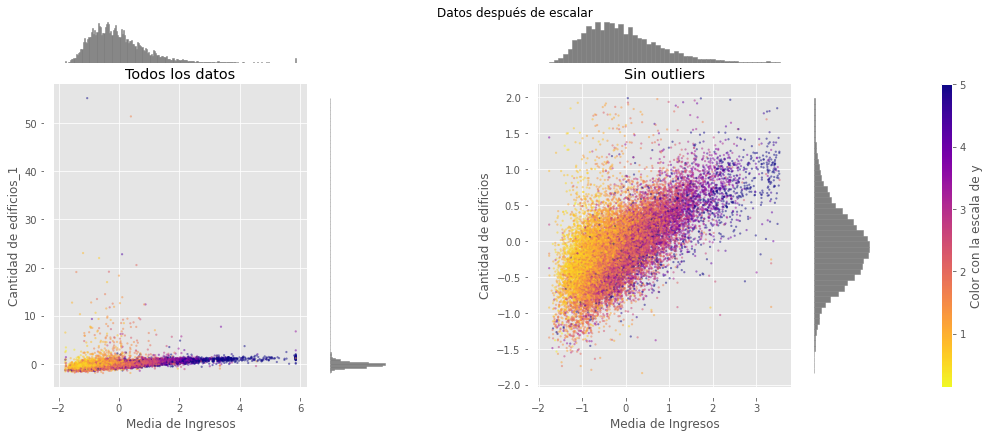

2 estudio:  Datos despues de aplicar min-max scalado
-->            0         1
0  0.539668  0.043512
1  0.538027  0.038224
2  0.466028  0.052756


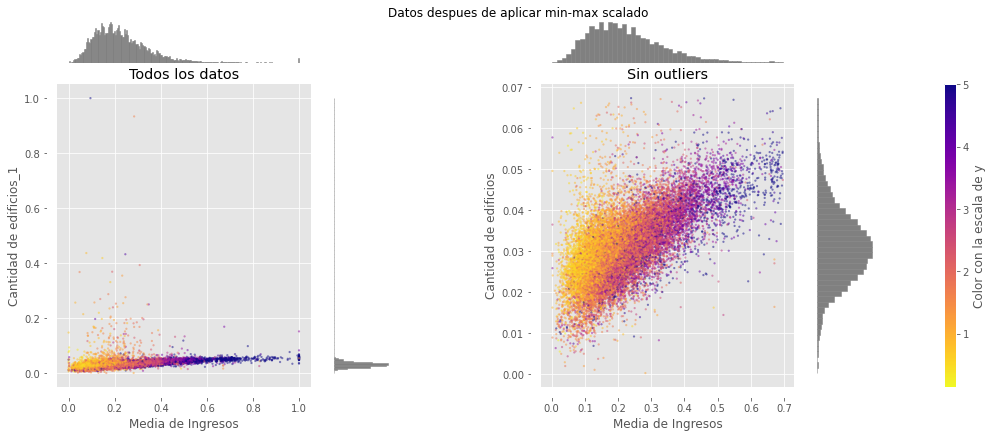

3 estudio:  Datos depués de  de la transformacion de cuartiles (uniforme)
-->            0         1
0  0.972520  0.902275
1  0.972217  0.794595
2  0.948467  0.973393


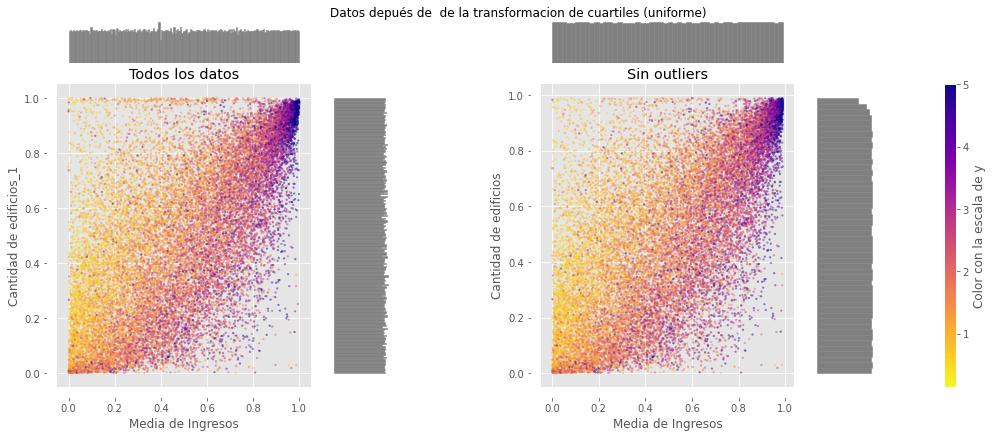

4 estudio:  Datos después de la transformacion (gaussiana)
-->            0         1
0  1.919185  1.294622
1  1.914418  0.822470
2  1.630171  1.933184


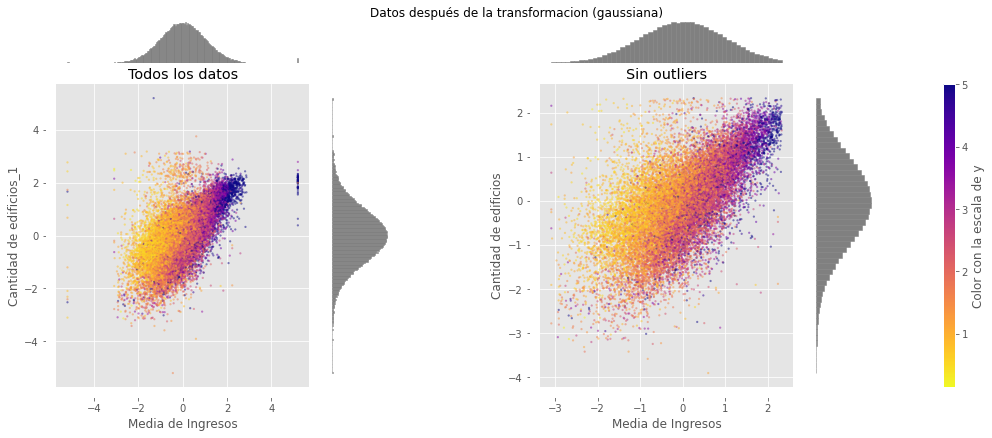

In [330]:
#@title
# Dibujo todas las transformaciones:

for s,t in enumerate(distributions):
  print(s, "estudio: ",distributions[s][0])
  make_plot(s)
  plt.show()

Proyecto de Elena

https://github.com/ElenaML81/TalentSquad_DataScienceI/blob/main/%20Talent%20Squad_Data%20Science%20I.ipynb

Poner un registro de requeriment para saber la version que utilizas en las importaciones.

